<a href="https://colab.research.google.com/github/YoannaHS/TelecomX-Challenge-II/blob/main/Telecom_Challenge_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importando librerías

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 2. Extracción del archivo CSV

In [4]:
df = pd.read_csv("/content/df_limpo.csv")
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [5]:
#verificar la estructura general de nuestro archivo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

# 3. Tratamiento de los Datos

## Elimando columnas irrelevantes para nuestro estudio

In [6]:
df = df.drop(columns=['customerID'])

## Agrupamos "No internet service" como "No" para simplificar la variable

In [7]:
# Para crear un nuevo DF
df_clean = df.copy()

# Agrupar "No internet service" como "No"
cols_to_fix = [
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
]

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')


## Encoding

In [8]:
# One-hot encoding (sin dummy trap)
categorical_cols = [
       'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'
]

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

In [9]:
df_encoded.head()

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,2.20,65.6,593.30,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,2.01,59.9,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.9,280.85,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.0,1237.85,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,2.97,83.9,267.40,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


In [10]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   Total.Day                                      7032 non-null   float64
 3   account.Charges.Monthly                        7043 non-null   float64
 4   account.Charges.Total                          7032 non-null   float64
 5   Churn_Yes                                      7043 non-null   bool   
 6   customer.gender_Male                           7043 non-null   bool   
 7   customer.Partner_Yes                           7043 non-null   bool   
 8   customer.Dependents_Yes                        7043 non-null   bool   
 9   phone.PhoneService_Yes                         7043 

## Verificamos si tenemos valores nulos

In [11]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,11
account.Charges.Monthly,0
account.Charges.Total,11
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


## Eliminamos valores nulos

In [12]:
df_encoded = df_encoded.dropna(subset=['Total.Day', 'account.Charges.Total'])
df_encoded.sample(10)

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
689,0,56,3.05,90.55,5116.60,False,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
1140,0,70,3.78,108.15,7930.55,False,False,True,True,True,...,True,False,True,True,True,False,True,True,False,False
900,1,42,2.65,79.35,3344.10,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4819,0,53,3.64,106.95,5785.50,True,False,False,False,True,...,True,False,True,True,True,False,True,True,False,False
555,1,27,2.62,81.45,2122.05,True,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
4500,1,44,2.96,88.40,3912.90,True,True,True,False,True,...,False,False,False,True,True,False,False,False,False,True
647,0,52,1.04,30.10,1623.40,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2226,0,66,3.46,105.65,6844.50,False,True,False,False,True,...,True,True,True,True,False,True,True,False,False,False
888,1,68,3.62,107.15,7379.80,False,True,True,True,True,...,True,True,True,True,True,False,True,True,False,False
1175,0,10,1.37,40.25,411.45,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,True


In [13]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,0
account.Charges.Monthly,0
account.Charges.Total,0
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


## Normalización de los Datos

In [20]:
# Identificar las columnas numéricas a normalizar (excluyendo las booleanas/binarias)
numerical_cols_to_normalize = ['customer.tenure', 'Total.Day', 'account.Charges.Monthly', 'account.Charges.Total']

# Inicializar el MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización Min-Max a las columnas seleccionadas
df_encoded[numerical_cols_to_normalize] = scaler.fit_transform(df_encoded[numerical_cols_to_normalize])

# Mostrar las primeras filas del DataFrame normalizado para verificar
display(df_encoded.head())

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,0.112676,0.484680,0.471144,0.066294,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,0.112676,0.431755,0.414428,0.060420,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,0.042254,0.523677,0.553731,0.030239,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,0.169014,0.754875,0.793532,0.140670,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,0.028169,0.699164,0.653234,0.028687,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


# Correlación entre Variables

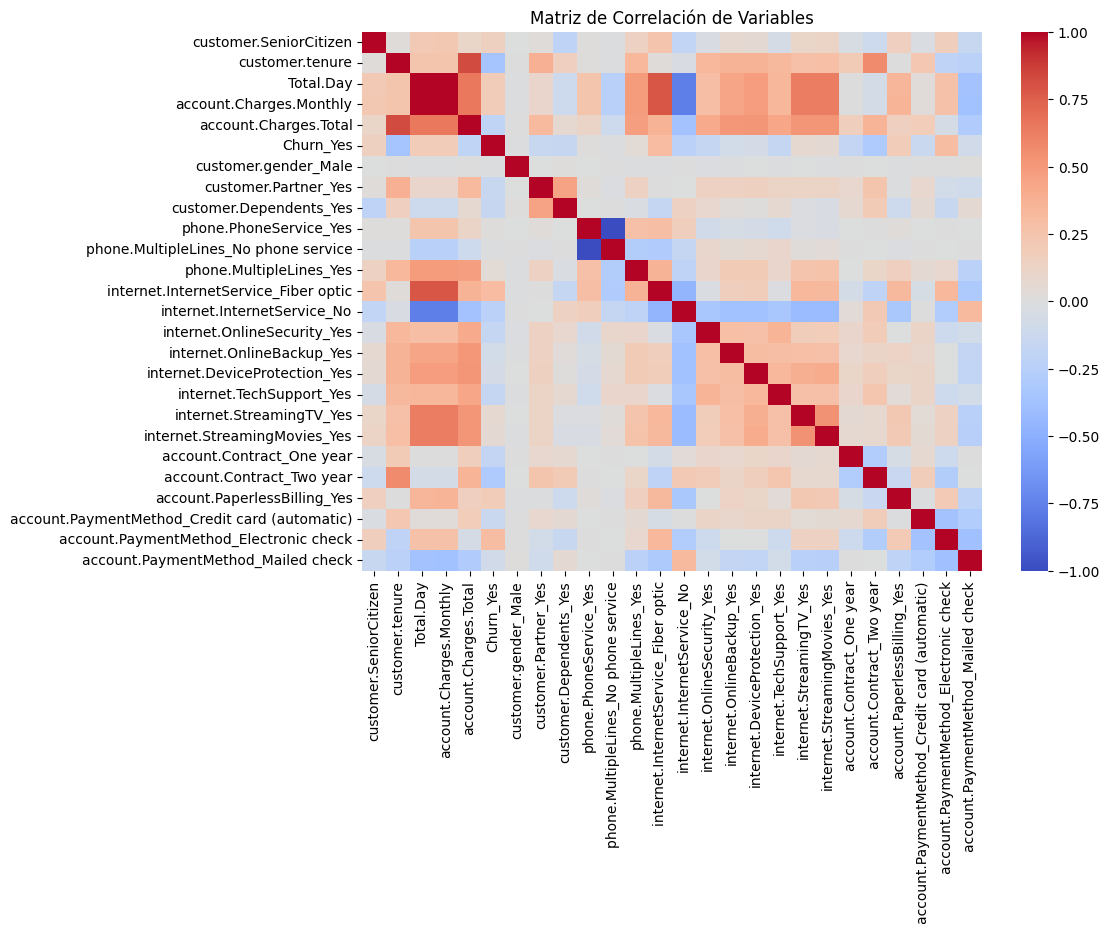

In [21]:
# Calcular la matriz de correlación
correlation_matrix = df_encoded.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación de Variables')
plt.show()

## Definimos la variable Target

In [33]:
target_var = 'Churn_Yes'

In [24]:
corr = df_encoded.corr()

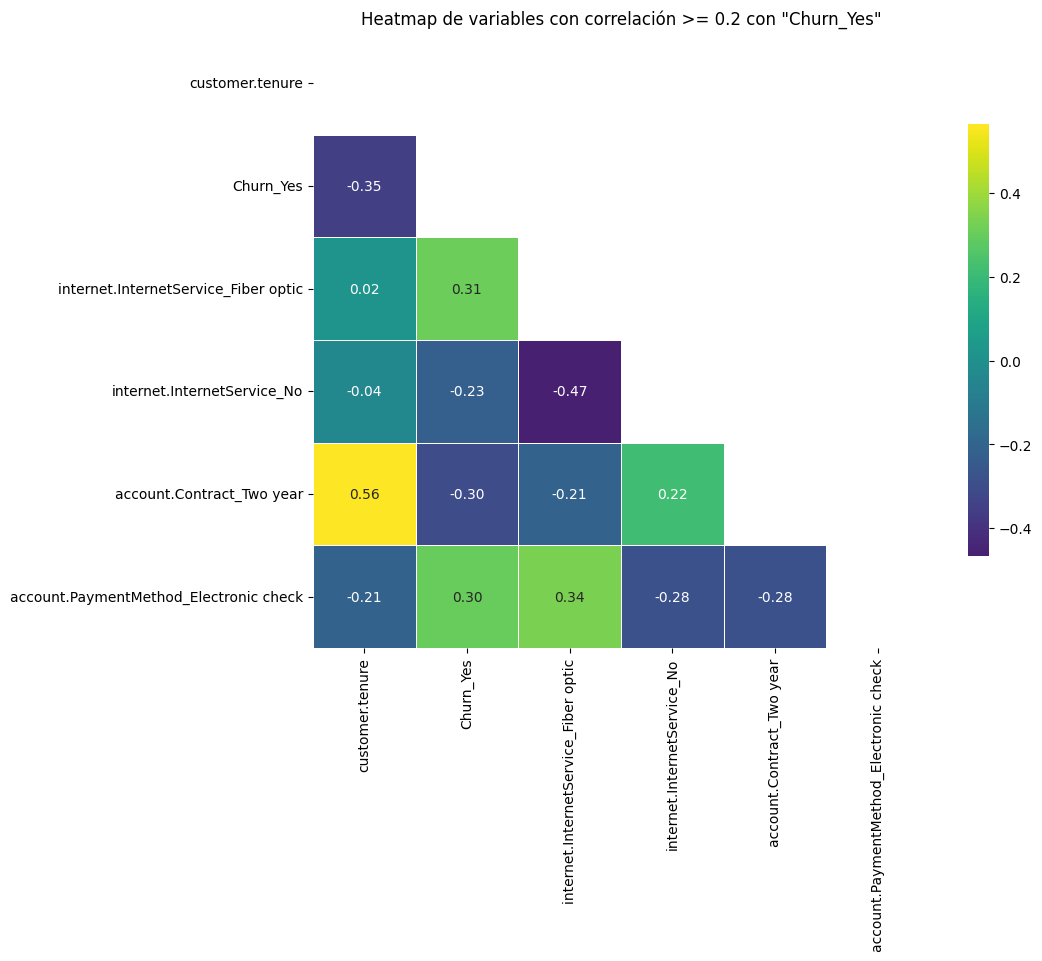

In [31]:
# Definir el umbral mínimo de correlación absoluta para selección
limiar = 0.2

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(10,8))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='viridis', # Cambiado el mapa de colores a 'viridis'
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {limiar} con "{target_var}"')
plt.show()

# Análisis Multicolinealidad

## 1. Selección de las variables independientes

In [34]:
# Aquí, no se incluye la variable objetivo Churn_Yes en el cálculo del VIF.
X = df_encoded.drop(columns=['Churn_Yes'])

## 2. Añadimos la constante

In [35]:
X_const = add_constant(X)

## 3. Calculamos el VIF

In [36]:
# Convert boolean columns to integers (0 or 1)
X_const = X_const.astype(float)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
9,phone.PhoneService_Yes,inf
10,phone.MultipleLines_No phone service,inf
4,account.Charges.Monthly,963.182907
12,internet.InternetService_Fiber optic,148.483946
3,Total.Day,133.627772
13,internet.InternetService_No,104.211503
19,internet.StreamingMovies_Yes,24.155684
18,internet.StreamingTV_Yes,24.078263
5,account.Charges.Total,10.869784
2,customer.tenure,7.613485


# Modelos Predictivos

## Separamos features y target

In [39]:
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

## Dividimos los datos de entrenamiento y prueba

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Balancear entrenamiento con SMOTE

In [45]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

In [46]:
# Instanciar y entrenar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Regresión Logística")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Regresión Logística
Exactitud: 0.7502369668246446
ROC AUC: 0.8453639804416395
Matriz de Confusión:
 [[1129  420]
 [ 107  454]]
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110

